In [2]:
import numpy as np
M=np.array([[1,2],[2,4]])
#计算2*2线性相关矩阵的秩
np.linalg.matrix_rank(M,tol=None)

1

In [20]:
import pandas as pd

#录入数据
digits_train=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra',header=None)
digits_test=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes',header=None)

In [21]:
digits_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
count,3823.0,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,...,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000
mean,0.0,0.301334,5.481821,11.805912,11.451478,5.505362,1.387392,0.142297,0.002093,1.960502,...,0.148313,0.000262,0.283024,5.855872,11.942977,11.461156,6.700497,2.105676,0.202197,4.497253
std,0.0,0.866986,4.631601,4.259811,4.537556,5.613060,3.371444,1.051598,0.088572,3.052353,...,0.767761,0.016173,0.928046,4.980012,4.334508,4.991934,5.775815,4.028266,1.150694,2.869831
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,10.000000,9.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,5.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,5.000000,13.000000,13.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,10.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,15.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,5.000000,15.000000,...,12.000000,1.000000,10.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [22]:
#分割数据
x_digits=digits_train[np.arange(64)]
y_digits=digits_train[64]


In [23]:
from sklearn.decomposition import PCA
#将高纬度压成二维空间分布
estimator=PCA(n_components=2)
x_pca=estimator.fit_transform(x_digits)

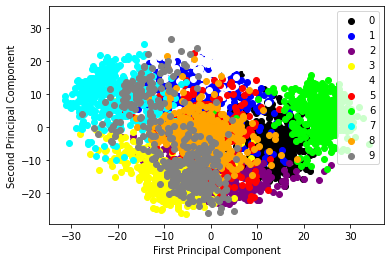

In [30]:
from matplotlib import pyplot as plt
    
def plot_pca_scatter():
    colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
    for i in range(len(colors)):
        px = x_pca[:, 0][y_digits.values == i]
        py = x_pca[:, 1][y_digits.values == i]
        plt.scatter(px, py, c=colors[i])
        
    plt.legend(np.arange(0,10).astype(str))
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.show()

plot_pca_scatter()

In [31]:
#使用支持向量机进行识别
x_train=digits_train[np.arange(64)]
y_train=digits_train[64]
x_test=digits_test[np.arange(64)]
y_test=digits_test[64]


In [32]:
#导入线性核支持向量机
from sklearn.svm import LinearSVC

#预测 对64纬度
svc=LinearSVC()
svc.fit(x_train,y_train)
y_predict=svc.predict(x_test)

#使用PCA压缩到20个纬度
estimator=PCA(n_components=20)

#转换为原训练特征
pca_x_train=estimator.fit_transform(x_train)
pca_x_test=estimator.transform(x_test)


E:\anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [33]:
#使用默认配置预测 对20纬度
pca_svc=LinearSVC()
pca_svc.fit(pca_x_train,y_train)
pca_y_predict=pca_svc.predict(pca_x_test)

E:\anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [34]:
#评分
from sklearn.metrics import classification_report

#原图像不做处理得分
print(svc.score(x_test,y_test))
print(classification_report(y_test,y_predict,target_names=np.arange(10).astype(str)))

#对PCA降维之后评分
print(pca_svc.score(pca_x_test,y_test))
print(classification_report(y_test,pca_y_predict,target_names=np.arange(10).astype(str)))

0.9371174179187535
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       178
           1       0.88      0.93      0.90       182
           2       0.98      0.99      0.99       177
           3       0.93      0.94      0.93       183
           4       0.96      0.97      0.96       181
           5       0.92      0.96      0.94       182
           6       0.99      0.98      0.99       181
           7       0.98      0.91      0.94       179
           8       0.96      0.80      0.88       174
           9       0.80      0.91      0.85       180

    accuracy                           0.94      1797
   macro avg       0.94      0.94      0.94      1797
weighted avg       0.94      0.94      0.94      1797

0.910962715637173
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       178
           1       0.79      0.87      0.83       182
           2       0.97      0.97      0.